## Сравнение среднего времени активности пользователей Яндекс.Книги в Москве и Санкт-Петербурге 

- Автор: Екатерина Лощинская
- Дата: 17.04.2025

## Цели и задачи проекта
<a class='anchor' id="link1"></a>

Цель: проверить статистическими методами, есть ли различия в среднем времени активности пользователей сервиса Яндекс.Книги в Москве и Санкт-Петербурге.

Задачи:
- загрузить данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности 

- провести проверку на дубликаты

- сравнить размеры групп, их статистики и распределение

- провести проверку нулевой гипотезы статистическими методами

- интерпретировать результаты

## Описание данных
<a class='anchor' id="link2"></a>

Таблицы этого проекта содержат данные о чтении и прослушивании контента в сервисе Яндекс Книги, которые включают информацию о пользователях, платформах, времени, длительности сессий и типах контента. Данные представлены за период с 1 сентября по 11 декабря 2024 года. Данные содержат несколько таблиц.
Таблица bookmate.audition содержит данные об активности пользователей.

Таблица bookmate.content содержит данные о контенте.

Таблица bookmate.author содержит данные об авторах контента. 

Таблица bookmate.geo содержит данные о местоположении. 

## Содержимое проекта


- [Цели и задачи проекта](#link1) 

- [Описание данных ](#link2)

- [Загрузка данных и знакомство с ними](#link3)

- [Проверка гипотезы в Python](#link4)

- [Аналитическая записка](#link5)

- [Анализ результатов А/В тестирования](#link6)

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Сохраним данные в датафрейм
books_df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')
# Выведем первые пять строк полученного датафрейма 
display(books_df.head())
 

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [3]:
books_df = books_df.drop(books_df.columns[0], axis = 1)

display(books_df.head())


,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [4]:
# Проверим наличие дубликатов в идентификаторах пользователей
duplicates = books_df.duplicated(subset='puid').sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 244


In [5]:
# Проверим, не является ли причиной возникновения дубликатов то, что id пользователя можно дублироваться для разных городов
duplicates = books_df.duplicated(subset=['city', 'puid']).sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 0


In [6]:
# Удалим дубликаты по puid
books_df = books_df.drop_duplicates(subset='puid')
duplicates = books_df.duplicated(subset='puid').sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 0


In [7]:
# Сравним размеры групп, их статистики и распределение
users_city = books_df.groupby('city')['puid'].nunique()
display (users_city)



city
Москва             6234
Санкт-Петербург    2306
Name: puid, dtype: int64

In [8]:
moscow_users = books_df[books_df['city'] == 'Москва']
display(moscow_users.head())
display(moscow_users.shape[0])

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


6234

In [9]:
spb_users = books_df[books_df['city'] == 'Санкт-Петербург']
display(spb_users.head())
display(spb_users.shape[0])

,city,puid,hours
6234,Санкт-Петербург,104923,60.353889
6235,Санкт-Петербург,146427,0.469559
6236,Санкт-Петербург,295646,1.258954
6237,Санкт-Петербург,601665,0.089076
6238,Санкт-Петербург,639360,0.334019


2306

In [10]:
moscow_users['hours'].describe()

count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64

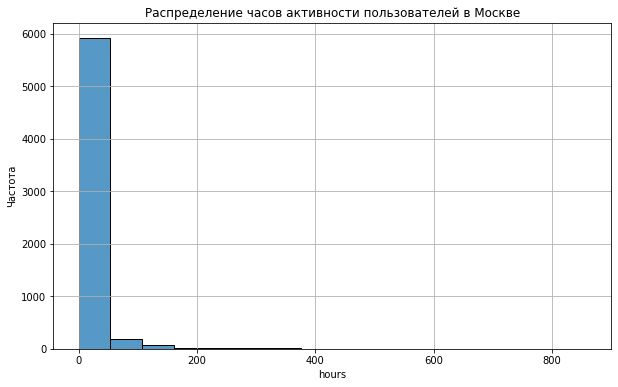

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=moscow_users, x='hours', bins=16)
plt.title('Распределение часов активности пользователей в Москве')
plt.ylabel('Частота')
plt.grid()
plt.show()

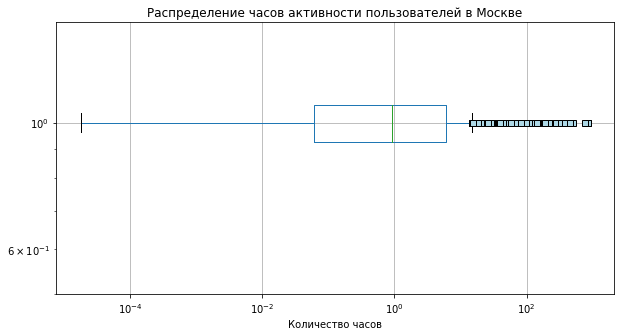

In [12]:
boxplot = moscow_users.boxplot(column='hours', vert=False, showfliers=True,
                               figsize=(10, 5),
                              flierprops=dict(markerfacecolor='lightblue', marker='s'))
boxplot.set_title('Распределение часов активности пользователей в Москве')
boxplot.set_xlabel('Количество часов')

# В данных большое количество выбросов, для наглядности используем логарифмическую шкалу
plt.xscale('log')
plt.yscale('log') 
plt.show()


In [13]:
spb_users['hours'].describe()

count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64

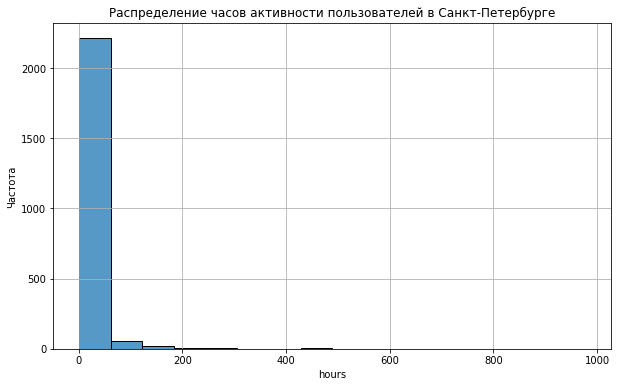

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data = spb_users, x='hours', bins=16)
plt.title('Распределение часов активности пользователей в Санкт-Петербурге')
plt.ylabel('Частота')
plt.grid()
plt.show()

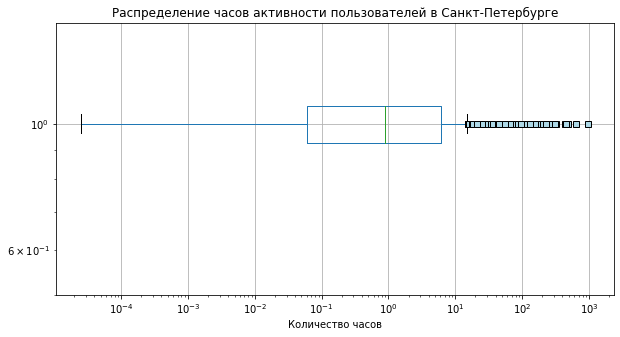

In [15]:
boxplot = spb_users.boxplot(column='hours', vert=False, showfliers=True,figsize=(10, 5),
                           flierprops=dict(markerfacecolor='lightblue', marker='s'))
                     
boxplot.set_title('Распределение часов активности пользователей в Санкт-Петербурге')
boxplot.set_xlabel('Количество часов')

# В данных большое количество выбросов, для наглядности используем логарифмическую шкалу
plt.xscale('log')
plt.yscale('log') 
plt.show()

 

Распределение часов активности пользователей демонстрирует гистограммы и диаграммы размаха Boxplot, построенные для Москвы и Санкт-Петербурга. 

Общее количество пользователей в Москве и Санкт-Петербурге значительно различается: 6243 в Москве, 2550 в Санкт-Петербурге, т.е. почти в 2.5 раза.

В обоих случаях для данных о количестве часов активности мы видим гистограмму правоасимметричного распределения. Правосторонняя, или положительная, скошенность гистограммы показывает, что среднее больше медианы. Распределение количества часов активности по городам, которое мы видим на гистограммах, очень схоже. Среднее значение для Москвы 10.9, для Санкт-Петербурга 11.6.  Стандартное отклонение в обоих городах значительно превышает среднее: 36.9, 39.7. 
 
В данных большое количество выбросов, поэтому для наглядности была использована логарифмическая шкала на графиках boxplot.

Таким образом, анализируя данные для проведения статистического теста, можно отметить, что распределение пользователей по группам неравномерно, однако распределение данных о количестве часов активности пользователей по городам, их среднее и стандартное отклонение очень схожи, что позволяет нам провести статистический тест. Принимая во внимание большое количество выбросов, для проверки гипотезы будет использован непараметрический тест Манна-Уитни.

## 2. Проверка гипотезы в Python


Проведем тест Манна-Уитни для ответа на вопрос, есть ли значимые различия в количестве часов активности пользователей из Москвы и Санкт-Петербурга.
Нулевая гипотеза H₀: Средняя активность пользователей в часах в Санкт-Петербурге не больше, чем в Москве. 
Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [16]:
from scipy.stats import mannwhitneyu

# Фиксируем уровень значимости
alpha = 0.05

mw_test = mannwhitneyu(
    moscow_users['hours'], 
    spb_users['hours'], 
    alternative='less' 
)
if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Подтверждается нулевая гипотеза. Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) статистически значимо не различается.')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не подтверждается. Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.')

pvalue=0.6189600878052618 > 0.05
Подтверждается нулевая гипотеза. Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) статистически значимо не различается.


## 3. Аналитическая записка


Целью проводимого исследования являлось проверить статистическими методами, есть ли различия в среднем времени активности пользователей сервиса Яндекс.Книги в Москве и Санкт-Петербурге.

Были проведены следующие этапы исследования:

1) загружены данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности

2) проведена проверка на дубликаты

3) проведено сравнение размеров групп, их статистики и распределения

4) проведена проверка нулевой гипотезы статистическими методами.

При проверке на дубликаты по идентификатору пользователя количество дубликатов составило 244. Дубликаты удалены.





 

Распределение часов активности пользователей демонстрирует гистограммы и диаграммы размаха Boxplot, построенные для Москвы и Санкт-Петербурга. 

Количество пользователей составило 6234 в Москве, 2550 в Санкт-Петербурге.

В обоих случаях для данных о количестве часов активности мы видим гистограмму правоасимметричного распределения. Правосторонняя, или положительная, скошенность гистограммы показывает, что среднее больше медианы.

Общее количество пользователей в Москве и Санкт-Петербурге заметно различается, однако распределение количества часов активности по городам, которое мы видим на гистограммах, очень схоже. Среднее значение для Москвы 10.9, для Санкт-Петербурга 11.6.  Стандартное отклонение в обоих городах значительно превышает среднее: 36.9, 39.7. 
В данных большое количество выбросов, поэтому для наглядности была использована логарифмическая шкала на графиках boxplot.

Для ответа на вопрос, есть ли значимые различия в количестве часов активности пользователей из Москвы и Санкт-Петербурга, был  проведен непараметрический тест Манна-Уитни, так как в данных большое количество выбросов. 


Нулевая гипотеза H₀: Средняя активность пользователей в часах в Санкт-Петербурге не больше, чем в Москве. 
Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Результат теста: Pvalue=0.6189600878052618 > 0.05.
Подтверждается нулевая гипотеза. Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) статистически значимо не различается.


----

## Оценка результатов А/В тестирования



Цель исследования: оценить результаты А/В тсетирования и проверить, привело ли упрощение интерфейса к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

Загрузим данные о пользователях и совершенных ими действиях.

In [17]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

Выведем первые пять строк датафреймов для ознакомления со структурой таблиц.

In [18]:
display(participants.head())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [19]:
display(events.head())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделим пользователей, участвующих в тесте, и проверим:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [20]:
# Выделим пользователей, участвующтх в интересующем нас тесте
interface_eu_test = participants[participants['ab_test'] == 'interface_eu_test']
display(interface_eu_test.head())
print(interface_eu_test.shape[0])

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
2,001064FEAAB631A1,A,interface_eu_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android


10850


In [21]:
# Проверим равномерность распределения пользователей по группам теста

group_a = interface_eu_test.loc[interface_eu_test['group'] == 'A']
group_b = interface_eu_test.loc[interface_eu_test['group'] == 'B']

#display(group_a.head())
users_a = group_a['user_id'].nunique()
users_b = group_b['user_id'].nunique()

display(f'Количество уникальных пользователей в группе А: {users_a}')
display(f'Количество уникальных пользователей в группе В: {users_b}')

'Количество уникальных пользователей в группе А: 5383'

'Количество уникальных пользователей в группе В: 5467'

In [22]:
# Рассчитаем процентную разницу в количестве пользователей в группах A и B
prcnt_diff = round ((100 * ((users_a - users_b) / users_a)), 2)

print(f'Процентная разница в количестве пользователей в группах A и B: {prcnt_diff}')

Процентная разница в количестве пользователей в группах A и B: -1.56


   users index
0   5383     A
1   5467     B


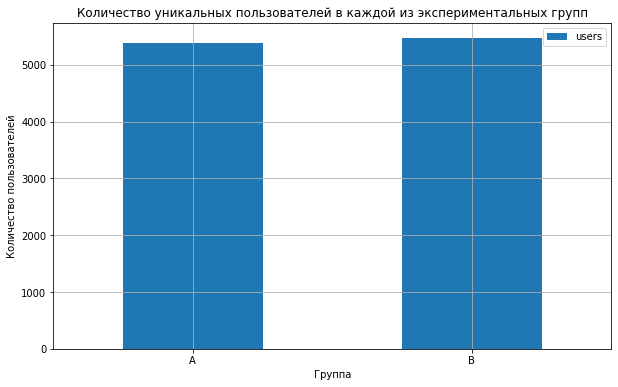

In [23]:
data = {'users': [users_a, users_b]}
df = pd.DataFrame(data)
df['index'] = ['A', 'B']
print(df)

df.plot.bar(x = 'index', y = 'users',
                title= 'Количество уникальных пользователей в каждой из экспериментальных групп',
                ylabel= 'Количество пользователей', 
                xlabel= 'Группа',      
                rot=0,
                figsize=(10, 6))

plt.grid()
plt.show()

Количество пользовталей в группе А составило 5383, в группе В 5467. Процентная разница в количестве пользователей в группах A и B: -1.56. Пользователи распределены в контрольной и тестовой группах равномерно. 

In [24]:
# Проверим отсутствие пересечений с конкурирующим тестом
test_interface = participants[participants['ab_test'] == 'interface_eu_test']
test_recommender = participants[participants['ab_test'] == 'recommender_system_test']
set1 = set(test_interface['user_id'])
set2 = set(test_recommender['user_id'])

intersection = set1.intersection(set2)

print(f'Количество пересечений:{len(intersection)}')



Количество пересечений:887


In [25]:
# Удалим пересечения с другим тестом 
duplicates=participants.duplicated(subset='user_id').sum()
print(f'Количество дубликатов: {duplicates}')

Количество дубликатов: 887


In [26]:
participants = participants.drop_duplicates(subset='user_id', keep='last') 

In [27]:
# Проверим отсутствие пересечений с конкурирующим тестом
test_interface = participants[participants['ab_test'] == 'interface_eu_test']
test_recommender = participants[participants['ab_test'] == 'recommender_system_test']
set1 = set(test_interface['user_id'])
set2 = set(test_recommender['user_id'])

intersection = set1.intersection(set2)

print(f'Количество пересечений:{len(intersection)}')


Количество пересечений:0


In [28]:
# Проверим отсутствие пересечений между контрольной и тестовой группами
set_a = set(group_a['user_id'])
set_b = set(group_b['user_id'])

intersection = set_a.intersection(set_b)

print(f'Количество пересечений:{len(intersection)}')

Количество пересечений:0


Были выявлены и удалены 887 пересечений пользователей с другим тестом. Эти пользователи удалены. Пересечений пользователей между контрольной и тестовой группами интересующего нас теста не выявлено.

In [29]:
interface_eu_test = participants[participants['ab_test'] == 'interface_eu_test']
print(interface_eu_test.shape[0])

10410


3\.2 Проанализируем данные о пользовательской активности по таблице `ab_test_events`:

- оставим только события, связанные с участвующими в изучаемом тесте пользователями;

In [30]:
display(events.head())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [31]:
events_interface_test = events.merge(interface_eu_test, on='user_id', how='inner')

In [32]:
print(events_interface_test['ab_test'].unique())

['interface_eu_test']


In [33]:
print(events_interface_test.shape[0])

76872


In [34]:
#display(events_interface_test.head())

- определим горизонт анализа: рассчитаем время (лайфтайм) совершения события пользователем после регистрации и оставим только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [35]:
# Определим даты регистрации для пользователей

date_registration = events_interface_test[events_interface_test['event_name'] == 'registration'][['user_id','event_dt']]
date_registration = date_registration.rename(columns = {'event_dt': 'reg_dt'})
display(date_registration.head())

,user_id,reg_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01
6,51278A006E918D97,2020-12-06 14:37:25
11,A0C1E8EFAD874D8B,2020-12-06 17:20:22
14,275A8D6254ACF530,2020-12-06 19:36:54
30,0B704EB2DC7FCA4B,2020-12-06 19:42:20


In [36]:
# Добавим даты регистрации к общей таблице

df = events_interface_test.merge(date_registration, on = 'user_id', how = 'left')

display(df.head())

,user_id,event_dt,event_name,details,group,ab_test,device,reg_dt
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone,2020-12-06 14:10:01
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01


In [37]:
# Рассчет разницы между событием и регистрацией

df['lifetime'] = df['event_dt'] - df['reg_dt']
display(df.head())

,user_id,event_dt,event_name,details,group,ab_test,device,reg_dt,lifetime
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 00:00:00
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:13
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:46
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48


In [38]:
# Определяем значение для фильтрации лайфтайм - 7 дней
from datetime import timedelta

delta = timedelta(days=7, hours=0, minutes=0, seconds=0)
print(delta)

7 days, 0:00:00


In [39]:
# Фильтрация по условию лайфтайм меньше 7 дней
df_week = df[df['lifetime'] < delta]
display(df_week.head())
# Для проверки выведем максимальное значение лайфтайм
print(df_week['lifetime'].max())

,user_id,event_dt,event_name,details,group,ab_test,device,reg_dt,lifetime
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 00:00:00
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:13
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:46
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48


6 days 23:58:10


Оценим достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

Для расчета минимального размера выборки использован калькулятор Эвана Миллера  с параметрами:

- базовый показатель конверсии 30%

- минимальный детектируемый эффект mde в абсолютном значении 3%

- мощность теста — 80%

- уровень значимости 5%

Получившийся результат: необходимый размер выборки для каждой группы составил 3 692 пользователя.

- рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [40]:
# Разделим на группы
df_a = df_week[df_week['group'] == 'A']
df_b = df_week[df_week['group'] == 'B']
display(df_a.head())
display(df_b.head())

,user_id,event_dt,event_name,details,group,ab_test,device,reg_dt,lifetime
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 00:00:00
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:13
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,0 days 11:15:46
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,A,interface_eu_test,iPhone,2020-12-06 14:10:01,2 days 22:30:48


,user_id,event_dt,event_name,details,group,ab_test,device,reg_dt,lifetime
11,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,B,interface_eu_test,iPhone,2020-12-06 17:20:22,0 days 00:00:00
12,A0C1E8EFAD874D8B,2020-12-07 07:32:43,login,NaN,B,interface_eu_test,iPhone,2020-12-06 17:20:22,0 days 14:12:21
30,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,B,interface_eu_test,PC,2020-12-06 19:42:20,0 days 00:00:00
31,0B704EB2DC7FCA4B,2020-12-07 20:55:10,login,NaN,B,interface_eu_test,PC,2020-12-06 19:42:20,1 days 01:12:50
32,0B704EB2DC7FCA4B,2020-12-07 20:56:52,login,NaN,B,interface_eu_test,PC,2020-12-06 19:42:20,1 days 01:14:32


In [41]:
# Найдем общее количество посетителей по группам
df_a_users = df_a['user_id'].nunique()
df_b_users = df_b['user_id'].nunique()
display(f'Общее количество пользователей в группе А: {df_a_users}')
display(f'Общее количество пользователей в группе В: {df_b_users}')

'Общее количество пользователей в группе А: 5161'

'Общее количество пользователей в группе В: 5249'

In [42]:
# Проверим, какое значение обозначает покупку
print(df_a['event_name'].unique())

['registration' 'login' 'product_page' 'product_cart' 'purchase']


In [43]:
# Рассчитаем для каждой группы количество посетителей, сделавших покупку
df_a_purchase = df_a[df_a['event_name'] == 'purchase']
df_b_purchase = df_b[df_b['event_name'] == 'purchase']

df_a_buyers = df_a_purchase['user_id'].nunique()
df_b_buyers = df_b_purchase['user_id'].nunique()
display(f'Общее количество покупателей в группе А: {df_a_buyers}')
display(f'Общее количество покупателей в группе В: {df_b_buyers}')

'Общее количество покупателей в группе А: 1430'

'Общее количество покупателей в группе В: 1548'

- сделаем предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

In [44]:
# Рассчитаем конверсию в покупку по группам
cr_a = round((df_a_buyers/df_a_users)*100, 2)
cr_b = round((df_b_buyers/df_b_users)*100, 2)
cr_diff = round(cr_b - cr_a, 2)
print(cr_a, cr_b)
print(f'Конверсия изменилась на {cr_diff}%.')

27.71 29.49
Конверсия изменилась на 1.78%.


При расчете коэффициента конверсии в контрольной и тестовой группах получились следующий результаты:

- CR в группе А составил 27.71%
 
- CR в группе В составил 29.49%

Конверсия изменилась на 1.78%, что меньше указанных в техническом задании 3%.

- Проверим изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Проверим изменение конверсии в помощью Z-теста пропорций.

Нулевая гипотеза: Коэффициент конверсии в группе В не больше, чем  в группе А.

Альтернативная гипотеза: Коэффициент конверсии в группе В больше, чем  в группе А.

In [45]:
# Используем Z-тест пропорций
from statsmodels.stats.proportion import proportions_ztest

# Все пользователи

n_a = df_a_users
n_b = df_b_users
# Совершили покупку

m_a = df_a_buyers
m_b = df_b_buyers

alpha = 0.05 # уровень значимости

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller' # альтернативная гипотеза, что CR группы А меньше, чем группы В
)

if p_value_ztest > alpha:
    print(f'pvalue={round(p_value_ztest, 5)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение. Коэффициенты конверсии в покупку в группах А и В значимо не различаются.')
else:
    print(f'pvalue={round(p_value_ztest, 5)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения. Коэффициенты конверсии в покупку в группах А и В значимо различаются.')

pvalue=0.02205 < 0.05
Нулевая гипотеза не находит подтверждения. Коэффициенты конверсии в покупку в группах А и В значимо различаются.


А/В тестирование interface_eu_test было проведено для оценки изменения конверсии в покупку. В результате введенных изменений ожидалось увеличение конверсии на 3%.

Для оценки результатов А/В тестирования была проведена фильтрация пользователей по тесту, в котором они участвовали - interface_eu_test. При проверке пересечений между пользователями двух проводимых тестов выявлены и исключены из последующего анализа 887 пользователей.

При проверке пересечений между группами А и В пересечений не выявлено.

Количество пользовталей в группе А составило 5383, в группе В 5467. Процентная разница в количестве пользователей в группах A и B: -1.56. Пользователи распределены в контрольной и тестовой группах равномерно. 

Далее проведена следующая фильтрация данных. Рассчитано время совершения события пользователем после регистрации и оставлены только те события, которые были выполнены в течение первых семи дней с момента регистрации. Для этого добавлен столбец 'lifetime'.

Для расчета минимального размера выборки использован калькулятор Эвана Миллера  с параметрами:

- базовый показатель конверсии 30%

- минимальный детектируемый эффект mde в абсолютном значении 3%

- мощность теста — 80%

- уровень значимости 5%


Получившийся результат: необходимый размер выборки для каждой группы составил 3 692 пользователя.


При расчете коэффициента конверсии в контрольной и тестовой группах получились следующий результаты:

- CR в группе А составил 27.71%
 
- CR в группе В составил 29.49%

Конверсия изменилась на 1.78%, что меньше указанных в техническом задании 3%.


Также изменение конверсии оценено статистически в помощью Z-теста пропорций.

Нулевая гипотеза: Коэффициент конверсии в группе В не больше, чем в группе А.

Альтернативная гипотеза: Коэффициент конверсии в группе В больше, чем в группе А.


По результатам статистического теста нулевая гипотеза не находит подтверждения. pvalue=0.02205 < 0.05. Коэффициенты конверсии в покупку в группах А и В значимо различаются.

Несмотря на то, что изменение конверсии в покупку составило 1.78%, что меньше указанных в техническом задании 3%, статистически это изменение значимо. Можно рекомендовать использовать новую версию сайта и оценить изменения интерфейса, которые проверялись в данном А/В тестировании, как эффективные.
